In [2]:
#pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/0d/ea/f936c14b6e886221e53354e1992d0c4e0eb9566fcc70201047bb664ce777/tensorflow-2.3.1-cp37-cp37m-macosx_10_9_x86_64.whl
    100% |████████████████████████████████| 1.0MB 10.0MB/s 
  Using cached https://files.pythonhosted.org/packages/bc/58/0aa6fb779dc69cfc811df3398fcbeaeefbf18561b6e36b185df0782781cc/absl_py-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
    100% |████████████████████████████████| 10.6MB 4.2MB/s 
  Using cached https://files.pythonhosted.org/packages/1a/8b/4d01ae9a9d50a0bcc7b0b9aae41785d8d9de6fa9bba04dc20b1582181d2d/h5py-2.10.0-cp37-cp37m-macosx_10_6_intel.whl
    100% |████████████████████████████████| 3.4MB 10.2MB/s 
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl

In [1]:
!pip install plaidml-keras plaidbench

In [2]:
!plaidbench keras mobilenet

Running 1024 examples with mobilenet, batch size 1, on backend plaid
INFO:plaidml:Opening device "metal_amd_radeon_pro_580.0"
Compiling network... Warming up... Running...
Example finished, elapsed: 0.406s (compile), 5.473s (execution)

-----------------------------------------------------------------------------------------
Network Name         Inference Latency         Time / FPS          
-----------------------------------------------------------------------------------------
mobilenet            5.34 ms                   0.00 ms / 1000000000.00 fps
Correctness: PASS, max_error: 1.675534622336272e-05, max_abs_error: 7.674098014831543e-07, fail_ratio: 0.0


In [3]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
os.environ["PLAIDML_EXPERIMENTAL"] = "1"
os.environ["PLAIDML_DEVICE_IDS"] = "opencl_amd_radeon_pro_580_compute_engine.0"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

Using plaidml.keras.backend backend.


In [ ]:
# check plaidml.keras.backend configuration 

import numpy as np
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
import keras.applications as kapp
from keras.datasets import cifar10

(x_train, y_train_cats), (x_test, y_test_cats) = cifar10.load_data()
batch_size = 8
x_train = x_train[:batch_size]
x_train = np.repeat(np.repeat(x_train, 7, axis=1), 7, axis=2)
model = kapp.VGG19()
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Running initial batch (compiling tile program)")
y = model.predict(x=x_train, batch_size=batch_size)

# Now start the clock and run 10 batches
print("Timing inference...")
start = time.time()
for i in range(10):
    y = model.predict(x=x_train, batch_size=batch_size)
print("Ran in {} seconds".format(time.time() - start))

In [18]:
#pip install keras

  Using cached https://files.pythonhosted.org/packages/44/e1/dc0757b20b56c980b5553c1b5c4c32d378c7055ab7bfa92006801ad359ab/Keras-2.4.3-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [5]:
# import

import os
import zipfile

#local_zip = '/tmp/validation-horse-or-human.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp/validation-horse-or-human')
#zip_ref.close()

In [8]:
# directories / files

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))


['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png', 'human05-22.png', 'human02-03.png', 'human02-17.png', 'human15-27.png', 'human12-12.png']
['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png', 'horse5-018.png', 'horse1-170.png', 'horse5-192.png', 'horse1-411.png', 'horse4-232.png', 'horse3-070.png']
['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png', 'valhuman01-10.png', 'valhuman01-11.png', 'valhuman01-05.png', 'valhuman03-14.png', 'valhuman03-00.png']
total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


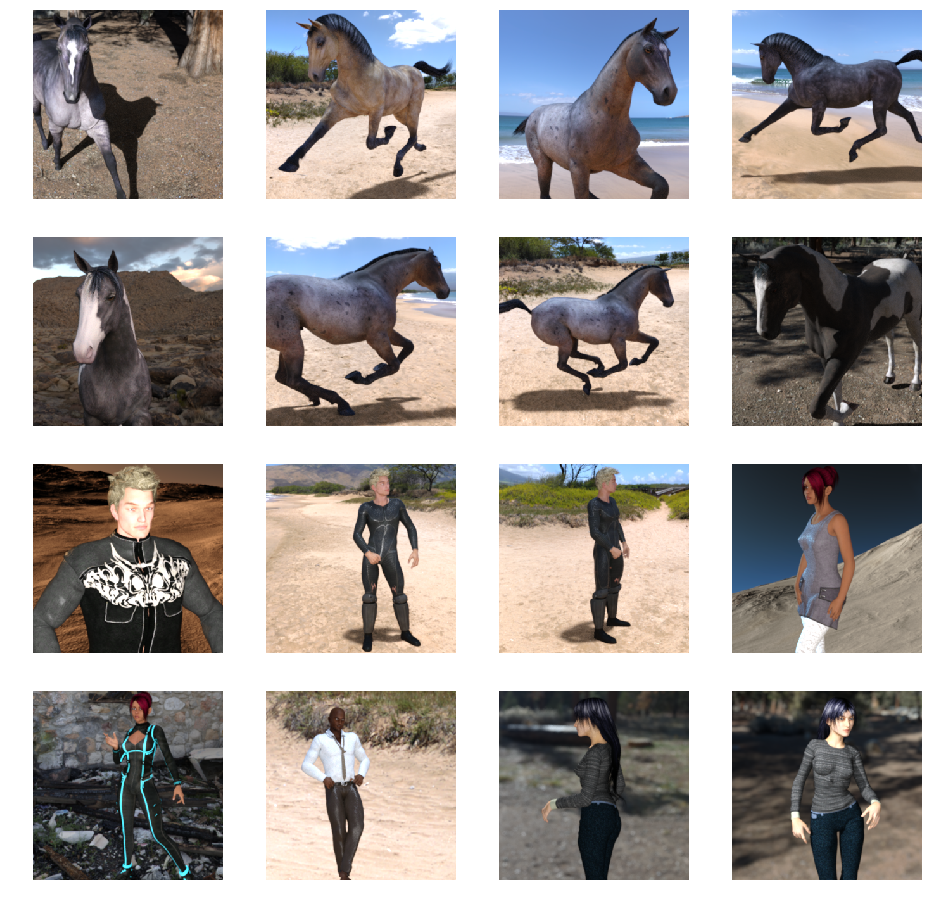

In [9]:
# sampling

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

flg = plt.gcf()
flg.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [10]:
# building a small model from scratch

# import

import tensorflow as tf

# create a model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [11]:
print(tf.__version__)

2.3.1


In [20]:
# summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [25]:
# compile a model

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer='RMSprop(lr=0.001)', metrics=['accuracy'])

ValueError: Unknown optimizer: RMSprop(lr=0.001)

In [18]:
# data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [17]:
# fit a model

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)



AttributeError: 'DirectoryIterator' object has no attribute 'ndim'

In [10]:
import numpy as np
from keras.preprocessing import image
import os, os.path

print('test horses folder')

# load images from a folder
images = []
#path = '/tmp/horse-or-human-test'
path = '/tmp/validation-horse-or-human/horses'
valid_images = ['.jpg', '.png', '.gif']

for fn in os.listdir(path):
    ext = os.path.splitext(fn)[1]
    if ext.lower() not in valid_images:
        continue
    images.append(os.path.join(path, fn))
    img = image.load_img(os.path.join(path, fn), target_size=(300,300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    image_vstack = np.vstack([x])
    classes = model.predict(image_vstack, batch_size=10)
    if classes[0] > 0.5:
        print(fn + ' is a human (' + str(classes[0]) + ')')
    else:
        print(fn + ' is a horse (' + str(classes[0]) + ')')



print('test humans folder')

# load images from a folder
images = []
#path = '/tmp/horse-or-human-test'
path = '/tmp/validation-horse-or-human/humans'
valid_images = ['.jpg', '.png', '.gif']

for fn in os.listdir(path):
    ext = os.path.splitext(fn)[1]
    if ext.lower() not in valid_images:
        continue
    images.append(os.path.join(path, fn))
    img = image.load_img(os.path.join(path, fn), target_size=(300,300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    image_vstack = np.vstack([x])
    classes = model.predict(image_vstack, batch_size=10)
    if classes[0] > 0.5:
        print(fn + ' is a human (' + str(classes[0]) + ')')
    else:
        print(fn + ' is a horse (' + str(classes[0]) + ')')

test horses folder
horse1-204.png is a human ([1.])
horse2-112.png is a human ([1.])
horse3-498.png is a human ([1.])
horse5-032.png is a human ([1.])
horse5-018.png is a human ([1.])
horse1-170.png is a human ([1.])
horse5-192.png is a human ([1.])
horse1-411.png is a horse ([0.])
horse4-232.png is a human ([1.])
horse3-070.png is a human ([1.])
horse1-000.png is a human ([1.])
horse5-342.png is a human ([1.])
horse5-550.png is a human ([1.])
horse4-541.png is a human ([1.])
horse4-345.png is a human ([1.])
horse2-314.png is a human ([1.])
horse5-181.png is a human ([1.])
horse5-235.png is a human ([1.])
horse3-099.png is a human ([1.])
horse4-556.png is a human ([1.])
horse3-217.png is a human ([1.])
horse1-298.png is a horse ([0.])
horse2-011.png is a human ([1.])
horse1-105.png is a human ([1.])
horse4-530.png is a human ([1.])
horse6-153.png is a human ([1.])
horse6-345.png is a human ([1.])
horse1-264.png is a horse ([0.])
horse6-218.png is a horse ([0.])
horse4-043.png is a huma

In [30]:
# Visualizing Intermediate Representations

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

ValueError: in user code:

    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/kyle/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer fc1 is incompatible with the layer: expected axis -1 of input shape to have value 25088 but received input with shape [None, 41472]
